In [157]:
url = 'https://epistat.sciensano.be/Data/COVID19BE_CASES_AGESEX.json'

import requests
import json
import numpy as np
import pandas as pd

# Population Source: https://statbel.fgov.be/en/themes/population/structure-population
pop2020 = [1218255, 6629143, 3645243]
pop2019 = [1208542, 6589069,3633795]
pop = pd.DataFrame(data=pop2020,index=['Brussels','Flanders','Wallonia']).T
pop.columns.name = 'REGION'

# Request data from Sciensano
r = requests.get(url)
data = pd.DataFrame(json.loads(r.text))

# Compute 7-day incidence
data['DATE'] = pd.to_datetime(data.DATE,format='%Y-%m-%d')
region = data.groupby(['DATE','REGION']).sum().unstack('REGION')
region = region['CASES']
incidence = region.rolling(window=7).sum().div(np.array(pop),axis=1)*100000

last_ten_days = incidence.tail(10).astype(int)

<AxesSubplot:xlabel='DATE'>

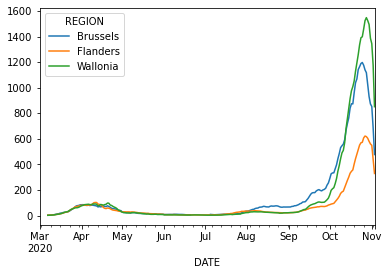

In [159]:
incidence.plot()

In [160]:
last_ten_days

REGION,Brussels,Flanders,Wallonia
DATE,,,
2020-10-25,1198,573,1399
2020-10-26,1176,607,1459
2020-10-27,1140,622,1525
2020-10-28,1118,618,1549
2020-10-29,1028,604,1526
2020-10-30,931,581,1495
2020-10-31,873,561,1388
2020-11-01,853,549,1345
2020-11-02,686,441,1175
